In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [2]:
def give_recommendations(index,restaurants, cos_sim_data, print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  for i in index_recomm:
    print(restaurants.iloc[i]['url'])

In [3]:
# find similarities between restaurants
def generate_similarities(restaurants):
    X = np.array(restaurants.iloc[0:, 1:])
    cos_sim_data = pd.DataFrame(cosine_similarity(X))
    return cos_sim_data

In [4]:
# plot the distribution of cosine similairty scores
# why are the scores so concentrated between 0.88 to 0.95? Might come from nature of input data. Keywords frome each topic is almost the same except hte location of restaurants. How do we deal w this?
import seaborn as sns

def plot_similarity_distribution(cos_sim_data):
    sns.distplot(cos_sim_data[0], hist=True, kde=True, 
                bins=int(180/5), color = 'darkblue', 
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4})

## Doc2Vec Trigram Recommendation Results

In [5]:
doc2vec = pd.read_csv("topic_modelling/doc2vec_labelled_restaurants_model4.csv", index_col = 0)
doc2vec

,url,cleaned_price,Healthy,Noodles,Indian,Seafood,BBQ,High Tea,Good Environment,Chinese,...,Tiong Bahru,Toa Payoh,Upper Bukit Timah,Upper East Coast Road,West Coast,Yishun,0,1,2,3
0,https://www.burpple.com/108-matcha-saro?bp_ref...,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,https://www.burpple.com/136-hong-kong-street-f...,15.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,https://www.burpple.com/15-stamford?bp_ref=%2F...,60.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,https://www.burpple.com/25-degrees-singapore?b...,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,https://www.burpple.com/46-mittsu?bp_ref=%2Ff%...,15.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,https://www.burpple.com/yun-nans?bp_ref=%2Ff%2...,20.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
841,https://www.burpple.com/zafferano?bp_ref=%2Ff%...,100.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
842,https://www.burpple.com/zai-shun-curry-fish-he...,15.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
843,https://www.burpple.com/zazz-pizza?bp_ref=%2Ff...,20.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
cos_sim_data = generate_similarities(doc2vec)

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


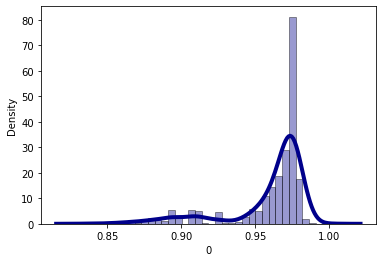

In [7]:
plot_similarity_distribution(cos_sim_data)

In [8]:
from random import randrange, seed
seed(123)
for i in range(5):
    gen = randrange(len(doc2vec))
    gen_name = doc2vec.iloc[gen]['url']
    print(f'Restaurant Passed in: {gen}, {gen_name}')
    give_recommendations(gen, doc2vec, cos_sim_data)

Restaurant Passed in: 53, https://www.burpple.com/arbora?bp_ref=%2Ff%2FHA9litI3
https://www.burpple.com/barossa-steak-grill-vivocity?bp_ref=%2Ff%2FXyj6s8K0
https://www.burpple.com/yardbirdsingapore?bp_ref=%2Ff%2FgAI6PP6r
https://www.burpple.com/birds-of-a-feather-sg?bp_ref=%2Ff%2FePaM290W
https://www.burpple.com/monti?bp_ref=%2Ff%2F5c1E67PG
https://www.burpple.com/basilico?bp_ref=%2Ff%2F72F1oz0r
Restaurant Passed in: 274, https://www.burpple.com/ginzaanzu?bp_ref=%2Ff%2FJERRng9F
https://www.burpple.com/okinawan-diner-niraikanai?bp_ref=%2Ff%2FCj8XjGyb
https://www.burpple.com/ikura-japanese-thomson-plaza?bp_ref=%2Ff%2FxxSlwm6M
https://www.burpple.com/the-blue-ginger?bp_ref=%2Ff%2FunJTnqWt
https://www.burpple.com/sichuan-douhua-uob-plaza?bp_ref=%2Ff%2FfC2B7sT3
https://www.burpple.com/kuro-maguro?bp_ref=%2F%40shazfx%2Ftimeline
Restaurant Passed in: 89, https://www.burpple.com/blue-label-pizza-wine?bp_ref=%2F%40enjoyous%2Ftimeline
https://www.burpple.com/the-guild-singapore?bp_ref=%2Ff%2FEYC

In [25]:
gen = 361
gen_name = doc2vec.iloc[gen]['url']
print(f'Restaurant Passed in: {gen}, {gen_name}')
give_recommendations(gen, doc2vec, cos_sim_data)

Restaurant Passed in: 361, https://www.burpple.com/kazoku-japanese-cuisine-1?bp_ref=%2F%40alamakgirl%2Ftimeline
https://www.burpple.com/uminamisg?bp_ref=%2Ff%2FQk7vUeQl
https://www.burpple.com/menbakasg?bp_ref=%2Ff%2F8Frg0TFc
https://www.burpple.com/nomiya?bp_ref=%2Ff%2FEsf2WAVe
https://www.burpple.com/shin-minori-japanese-restaurant?bp_ref=%2F%40destiny2309%2Ftimeline
https://www.burpple.com/koh-grill-sushi-bar?bp_ref=%2Ff%2FZlJD45Z0


Int64Index([361], dtype='int64')

## LDA Recommendation Results

In [13]:
lda = pd.read_csv("topic_modelling/lda_labelled_restaurants.csv", index_col = 0)

In [14]:
cos_sim_data = generate_similarities(lda)

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


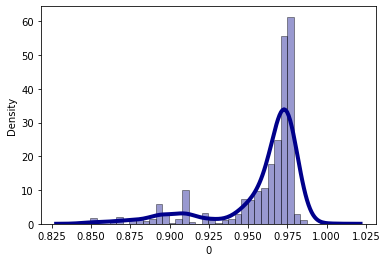

In [15]:
plot_similarity_distribution(cos_sim_data)

In [16]:
from random import randrange, seed
seed(123)
for i in range(5):
    gen = randrange(len(doc2vec))
    gen_name = doc2vec.iloc[gen]['url']
    print(f'Restaurant Passed in: {gen}, {gen_name}')
    give_recommendations(gen, lda, cos_sim_data)

Restaurant Passed in: 53, https://www.burpple.com/arbora?bp_ref=%2Ff%2FHA9litI3
https://www.burpple.com/yardbirdsingapore?bp_ref=%2Ff%2FgAI6PP6r
https://www.burpple.com/barossa-steak-grill-vivocity?bp_ref=%2Ff%2FXyj6s8K0
https://www.burpple.com/wine-rvlt?bp_ref=%2Ff%2FaG07BsSE
https://www.burpple.com/bedrock-bar-grill?bp_ref=%2Ff%2FaAYfn9v2
https://www.burpple.com/birds-of-a-feather-sg?bp_ref=%2Ff%2FePaM290W
Restaurant Passed in: 274, https://www.burpple.com/ginzaanzu?bp_ref=%2Ff%2FJERRng9F
https://www.burpple.com/joyden-canton-kitchen-1?bp_ref=%2Ff%2F6g4njus3
https://www.burpple.com/sichuan-douhua-uob-plaza?bp_ref=%2Ff%2FfC2B7sT3
https://www.burpple.com/peach-garden-8?bp_ref=%2Ff%2FGEwFfGLb
https://www.burpple.com/fat-cow?bp_ref=%2Ff%2FNrA4CwFV
https://www.burpple.com/peach-garden-restaurant-ocbc-centre?bp_ref=%2Ff%2F3kllGfJu
Restaurant Passed in: 89, https://www.burpple.com/blue-label-pizza-wine?bp_ref=%2F%40enjoyous%2Ftimeline
https://www.burpple.com/pura-brasa-singapore?bp_ref=%2Ff